/var/folders/9l/8q004vz93j7bbxwrjzkvchvr0000gn/T/ipykernel_4081/448370886.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  node_color=node_colors, cmap=plt.cm.get_cmap('viridis', len(unique_labels)))


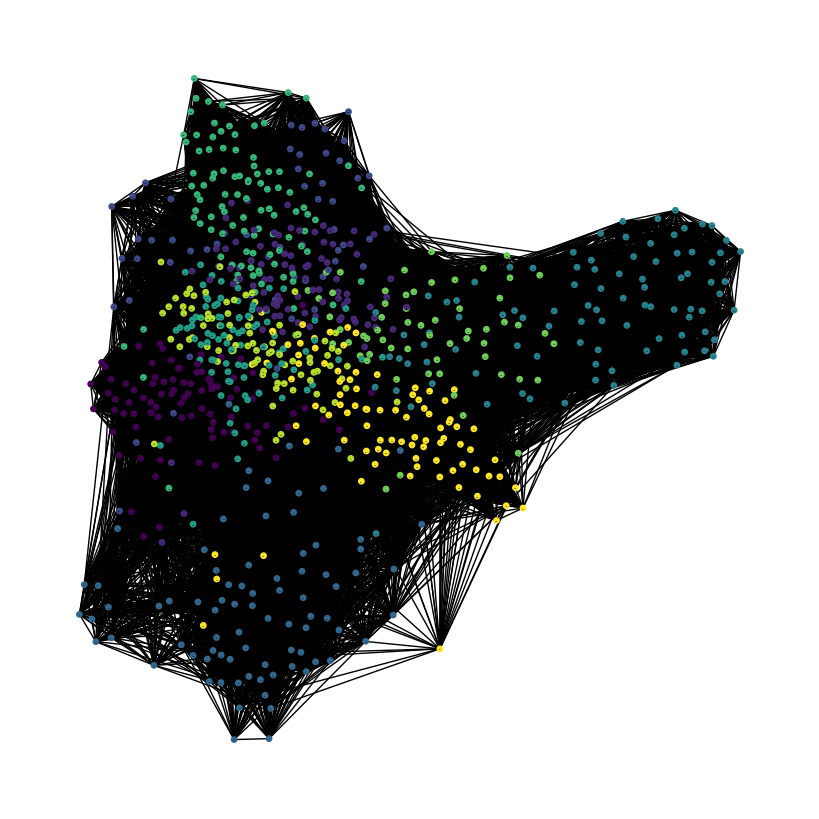

In [1]:
"""
4.1
"""

import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
G = nx.read_weighted_edgelist("SS-Butterfly_weights.tsv",nodetype = int)
pos = nx.spring_layout(G)

label_data = np.loadtxt("SS-Butterfly_labels.tsv", dtype=str, delimiter='\t')
node_labels = {int(row[0]): row[1] for row in label_data}

unique_labels = list(set(node_labels.values()))
color_map = {label: i for i, label in enumerate(unique_labels)}

node_colors = [color_map[node_labels[node]] for node in G.nodes()]
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=15, font_size=1, 
        node_color=node_colors, cmap=plt.cm.get_cmap('viridis', len(unique_labels)))
plt.show()

coords =  np.array(list(pos.values()))

/var/folders/9l/8q004vz93j7bbxwrjzkvchvr0000gn/T/ipykernel_4081/825197902.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  node_color=node_colors, cmap=plt.cm.get_cmap('viridis', len(unique_labels)))


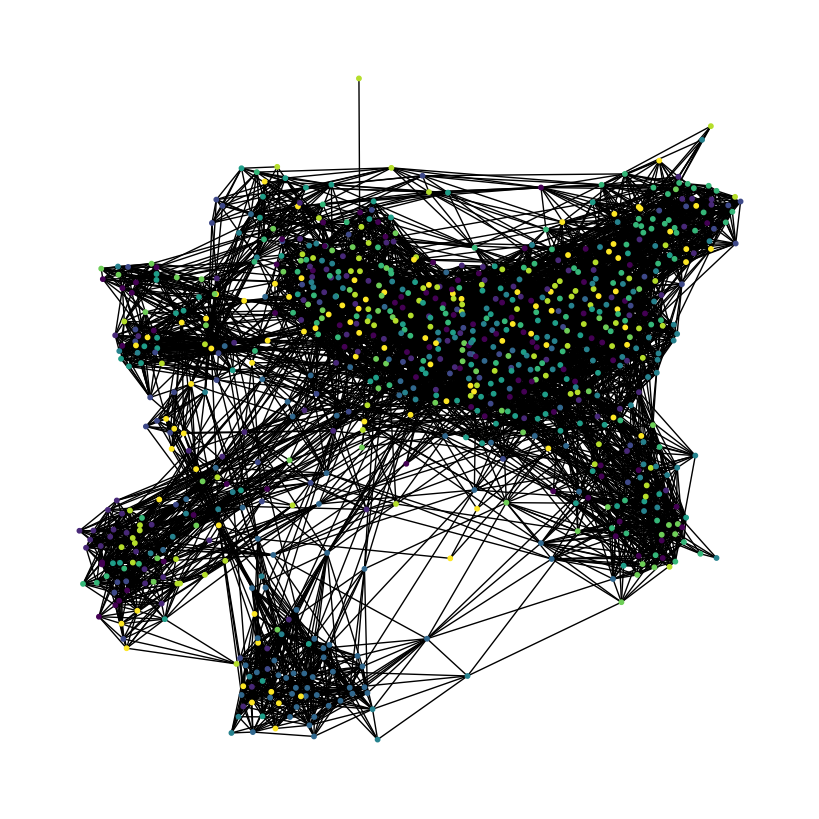

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

"""
4.2b
"""

def sparsify_graph_knn(G, k, epsilon):
    """
    Sparsify teh graph G by keeping only k-NN that are within epsilon of each other
    """
    G_knn = nx.Graph()
    
    for node in G.nodes():
        neighbors = sorted([(neighbor, G[node][neighbor]['weight']) for neighbor in G.neighbors(node)], key=lambda x: x[1])
        knn_neighbors = [(neighbor, weight) for neighbor, weight in neighbors if weight >= epsilon][:k]
        for neighbor, weight in knn_neighbors:
            G_knn.add_edge(node, neighbor, weight=weight)
    
    return G_knn

G = nx.read_weighted_edgelist("SS-Butterfly_weights.tsv", nodetype=int)

k = 15
epsilon = 0.1
G_knn = sparsify_graph_knn(G, k, epsilon)

pos = nx.spring_layout(G_knn)
plt.figure(figsize=(8, 8))
nx.draw(G_knn, pos, with_labels=False, node_size=10, font_size=1, 
        node_color=node_colors, cmap=plt.cm.get_cmap('viridis', len(unique_labels)))

plt.show()


Optimal k: 14


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9l/8q004vz93j7bbxwrjzkvchvr0000gn/T/ipykernel_4081/537429002.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  node_color=cluster_labels, cmap=plt.cm.get_cmap('viridis', n_clusters))


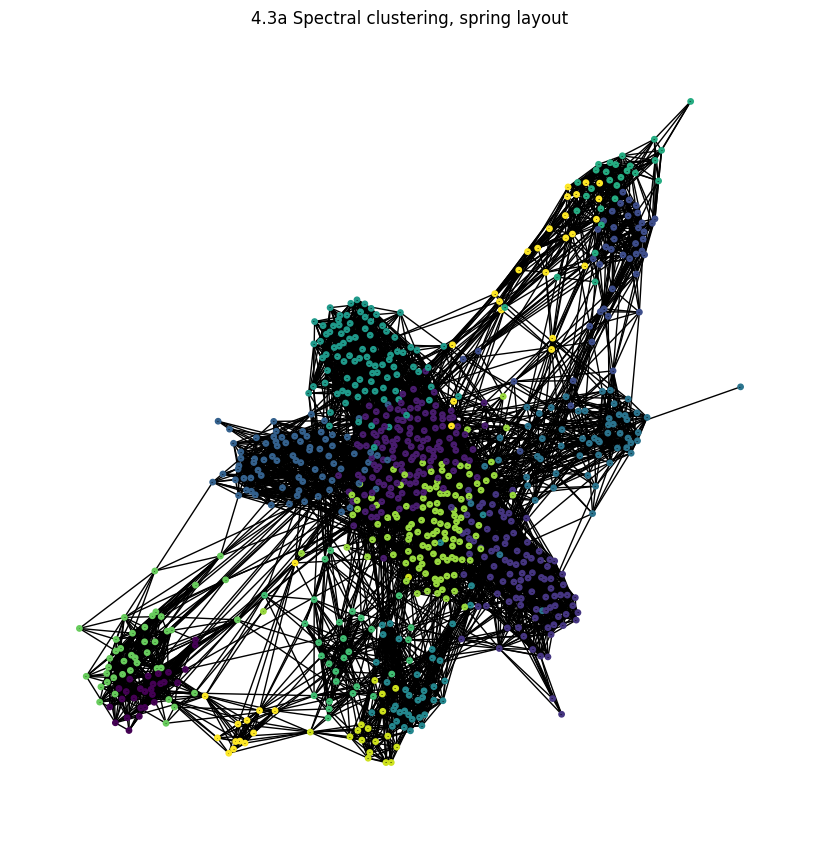

/var/folders/9l/8q004vz93j7bbxwrjzkvchvr0000gn/T/ipykernel_4081/537429002.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X, Y, c=labels, cmap=plt.cm.get_cmap('viridis', len(set(cluster_labels))), s=15)


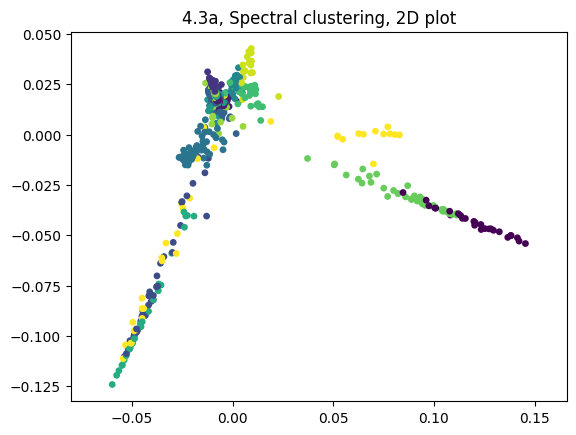

4.3b Silhouette score for spectral clustering: 0.024433547291264686


In [3]:
"""
4.3

load to graph g, construct adjacency matrix: for all edges, if it's bigger than epsilon
"""
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

def get_max_eigenvalue_gap(eigvals):
    """
    Get optimal k by finding the largest gap between eigenvalues
    """
    max_gap = 0
    best_index = 1
    for i in range(1, len(eigvals)):
        if eigvals[i] - eigvals[i - 1] > max_gap:
            max_gap = eigvals[i] - eigvals[i - 1]
            best_index = i
    return best_index

def spectral_clustering(G):
    """
    Perform spectral clustering on a graph G
    """
    L = nx.normalized_laplacian_matrix(G).todense()
    eigvals, eigvecs = np.linalg.eigh(L)
    eigvecs_sorted = eigvecs[:, np.argsort(eigvals)]
    optimal_k = get_max_eigenvalue_gap(eigvals)
    print(f"Optimal k: {optimal_k}")
    X = eigvecs_sorted[:, 1:n_clusters]
    X_normalized = normalize(np.asarray(X))
    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X_normalized)
    
    return kmeans.labels_

def spectral_cluster_spring(G, labels):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=15, font_size=1, 
            node_color=cluster_labels, cmap=plt.cm.get_cmap('viridis', n_clusters))
    plt.title("4.3a Spectral clustering, spring layout")
    plt.show()

def spectral_cluster_2d(G, labels):
    """
    Given the labels, plot the clustering in 2d after spectral clustering
    using the top two eigenvectors
    """
    L = nx.normalized_laplacian_matrix(G).todense()
    eigvals, eigvecs = np.linalg.eigh(L)
    eigvecs_sorted = eigvecs[:, np.argsort(eigvals)]
    top_eigs = eigvecs_sorted[:, 1:3]
    X = top_eigs[:, 0].flatten().tolist()
    Y = top_eigs[:, 1].flatten().tolist()

    plt.scatter(X, Y, c=labels, cmap=plt.cm.get_cmap('viridis', len(set(cluster_labels))), s=15)
    plt.axis('equal')
    plt.title("4.3a, Spectral clustering, 2D plot")
    plt.show()
    return np.asarray(top_eigs)

n_clusters = 14
cluster_labels = spectral_clustering(G_knn)
spectral_cluster_spring(G_knn, cluster_labels)
spectral_clustering_2d_embedding = spectral_cluster_2d(G_knn, cluster_labels)

silhouette_avg = silhouette_score(spectral_clustering_2d_embedding, cluster_labels)
print(f"4.3b Silhouette score for spectral clustering: {silhouette_avg}")

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/var/folders/9l/8q004vz93j7bbxwrjzkvchvr0000gn/T/ipykernel_4081/1544070277.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  node_color=colors, cmap=plt.cm.get_cmap('viridis', len(set(labels))))


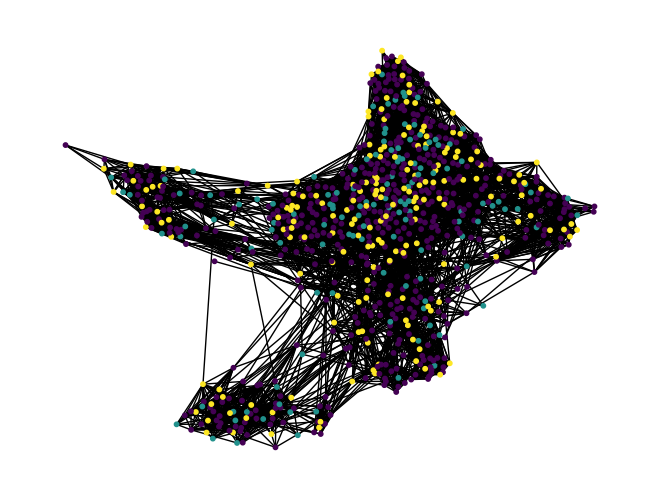

4.4b silhouette score: -0.0006717130228523377


/var/folders/9l/8q004vz93j7bbxwrjzkvchvr0000gn/T/ipykernel_4081/1544070277.py:34: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distances, method='complete')


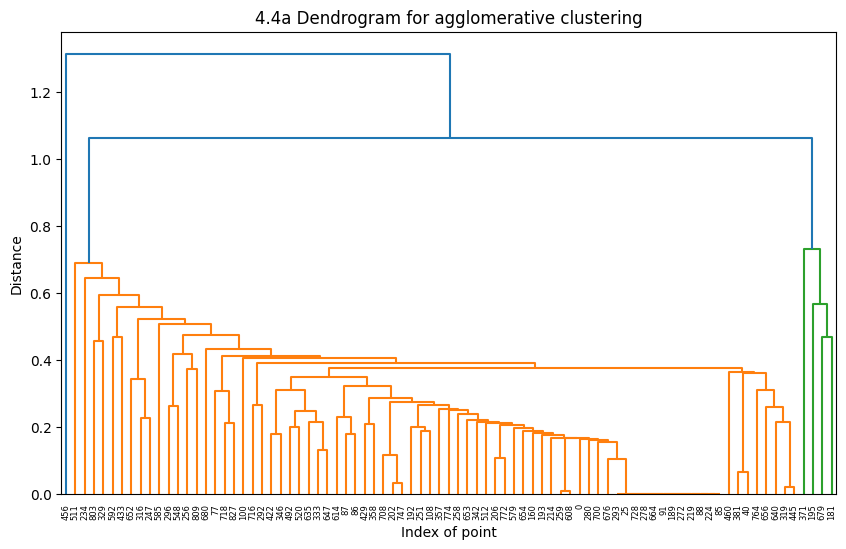

In [4]:
"""
4.4 Agglomerative clustering with sklearn
(Is this suppsoed to be done on teh 2d embedding?)
"""
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import random
from scipy.spatial.distance import squareform
from sklearn.metrics import pairwise_distances

adj_matrix = nx.to_numpy_array(G_knn)

n_clusters = 3
clustering_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
labels = clustering_model.fit_predict(adj_matrix)

node_labels = dict(zip(G.nodes, labels))

colors = [node_labels[node] for node in G_knn.nodes]
nx.draw(G_knn, with_labels=False, node_size=10, font_size=1, 
        node_color=colors, cmap=plt.cm.get_cmap('viridis', len(set(labels))))
plt.show()

dists = pairwise_distances(adj_matrix, metric='euclidean')
silhouette_avg = silhouette_score(dists, labels, metric='precomputed')
print(f"4.4b silhouette score: {silhouette_avg}")

def plot_dendrogram(G, sample_fraction=0.1):
    nodes = list(G.nodes())
    sample_size = max(1, int(sample_fraction * len(nodes)))
    sampled_nodes = random.sample(nodes, sample_size)
    subgraph = G.subgraph(sampled_nodes)
    distances = nx.to_numpy_array(subgraph)
    Z = linkage(distances, method='complete')

    plt.figure(figsize=(10, 6))
    dendrogram(Z, labels=list(sampled_nodes))
    plt.title('4.4a Dendrogram for agglomerative clustering')
    plt.xlabel('Index of point')
    plt.ylabel('Distance')
    plt.show()
plot_dendrogram(G_knn)


/var/folders/9l/8q004vz93j7bbxwrjzkvchvr0000gn/T/ipykernel_4081/1986739216.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  node_color=node_colors, cmap=plt.cm.get_cmap('viridis', len(unique_labels)))


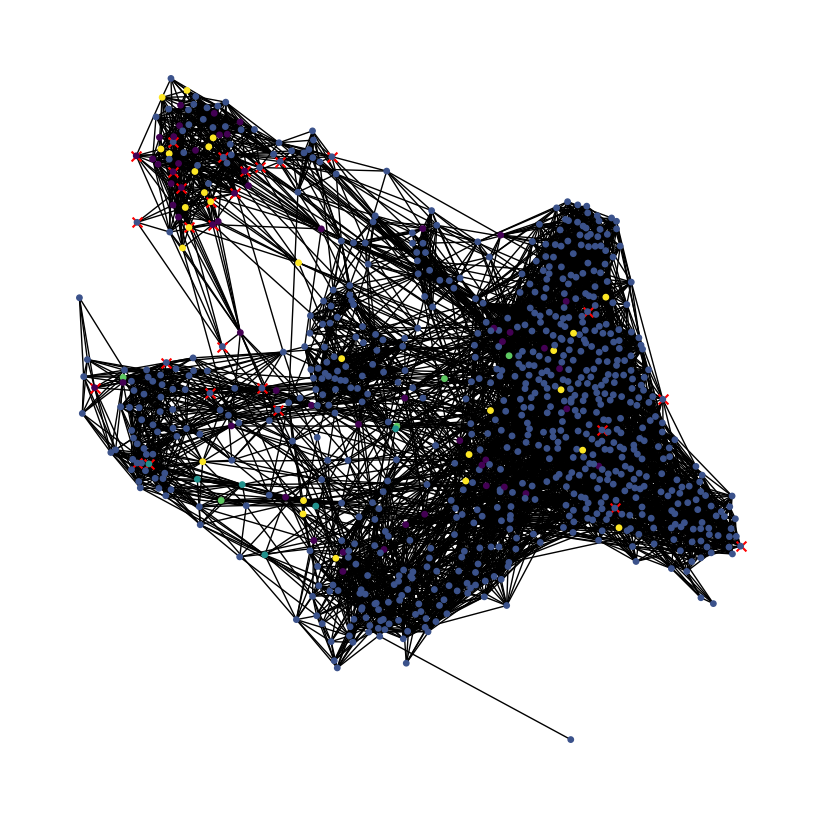

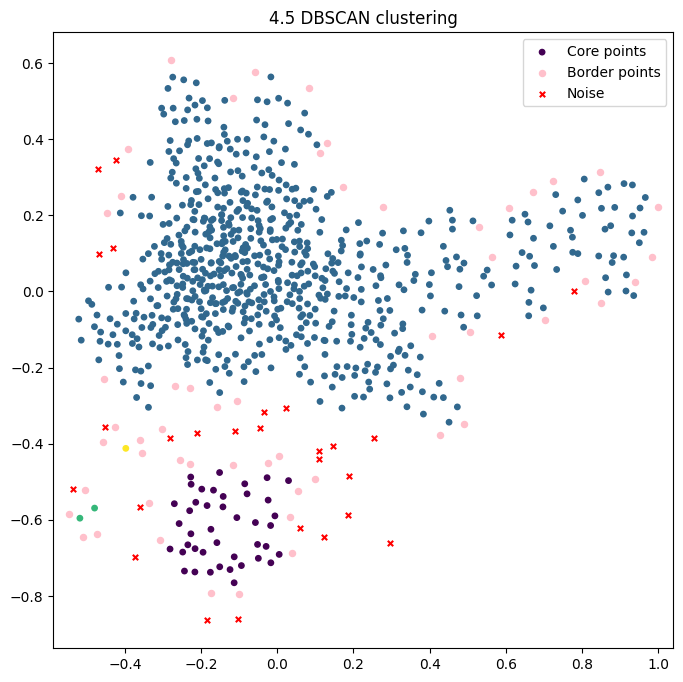

4.5b Silhouette score for DBSCAN clustering: 0.24124456833132452


In [5]:
"""
4.5 Density based clustering
"""
from sklearn.cluster import DBSCAN

epsilon = 0.07
min_samples = 5

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(coords)

core_indices = dbscan.core_sample_indices_
core_points = np.where(np.isin(np.arange(len(labels)), core_indices))[0]
border_points = np.where((labels >= 0) & (~np.isin(np.arange(len(labels)), core_indices)))[0]
noise_points = np.where(labels == -1)[0]

unique_labels = set(labels)
color_map = {label: i for i, label in enumerate(unique_labels) if label != -1} # ignore the noise points
node_colors = [color_map.get(label, len(unique_labels)) for label in labels]

pos = nx.spring_layout(G_knn)

plt.figure(figsize=(8, 8))
nx.draw(G_knn, pos, with_labels=False, node_size=15, font_size=1, 
        node_color=node_colors, cmap=plt.cm.get_cmap('viridis', len(unique_labels)))

# Noise points plotted separately
noise_positions = [pos[i] for i in noise_points]
x_coords, y_coords = zip(*noise_positions)
plt.scatter(x_coords, y_coords, color='red', marker='x', s=50, label="Noise Points")


plt.figure(figsize=(8, 8))
plt.scatter(coords[core_points, 0], coords[core_points, 1], 
            c=labels[core_points], cmap='viridis', s=15, label='Core points')

plt.scatter(coords[border_points, 0], coords[border_points, 1], 
            color='pink', s=15, label='Border points', linewidth=1.5)

plt.scatter(coords[noise_points, 0], coords[noise_points, 1], 
            color='red', s=15, label='Noise', marker='x')

plt.title("4.5 DBSCAN clustering")
plt.axis('equal')
plt.legend()
plt.show()

silhouette_avg = silhouette_score(coords, labels)
print(f"4.5b Silhouette score for DBSCAN clustering: {silhouette_avg}")